# GOOGLE APP RATING - DATA ANALYSIS



Analyzing the apps found on Google Playstore to get an overview of the relationship between all the
parameters and how do they add to the efficiency of the product. For the same, we have processed the data and visualised it with help of popular python libraries.

## Importing necessary libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and understanding the dataset

In [ ]:
ds = pd.read_csv('googleplaystore.csv')

In [ ]:
ds.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
ds.describe()  # statistical information about data

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
ds.dtypes  # Check Datatypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Data Preprocessing


### Taking care of the missing values

In [ ]:
ds.info(null_counts=True)  # information about a DataFrame including the index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Unwanted columns like Current Ver, Android Ver, Last Updated can be removed 
# They are not of much use
ds.drop(['Current Ver', 'Last Updated', 'Android Ver'], axis=1, inplace=True)

In [ ]:
ds.info(null_counts=True)  # Checking info again 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


In [ ]:
ds.isnull().sum()  # to check the presence of any missing or NaN values in the dataset

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [ ]:
ds[ds['Type'].isnull()]  # null values in Type column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy


In [ ]:
# Since the Type is mentioned Free for Command and Conquer Rivals in Playstore
# Replacing the NaN value with Free
ds['Type'].fillna('Free', inplace=True)

In [ ]:
ds.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


In [ ]:
ds[ds['Content Rating'].isnull()]  # Missing values in Content Rating column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [ ]:
# row 10472 has missing data for Content Rating column
# Hence, dropping this particular row
ds.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
ds.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(1), object(9)
memory usage: 931.6+ KB


**The rating column contains 1474 missing values, which can be replaced by the mode of this column using SimpleImputer**

In [ ]:
# Importing SimpleImputer from sklearn library 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  # using strategy as 'most_frequent' i.e. mode
imputer.fit(ds.iloc[:, 2:3])  # Passing the Rating column 
ds['Rating'] = imputer.transform(ds.iloc[:, 2:3])  # transforming the Rating column

In [ ]:
ds.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(1), object(9)
memory usage: 931.6+ KB


### Converting columns - **Reviews, Size, Installs, Price** into int or float

In [ ]:
# Converting values in Price column to numerics
ds['Price'] = ds.Price.apply(lambda x: x.strip('$'))  # Removing the ($) special character
ds['Price'] = pd.to_numeric(ds['Price'])

In [ ]:
# Converting Reviews column type to int
ds['Reviews'] = ds.Reviews.astype(int)

In [ ]:
# In Size column --> we have to remove many characters like M, K, +, Varies with device

ds['Size'] = ds.Size.apply(lambda x: x.strip('+'))  # Removing +
ds['Size'] = ds.Size.apply(lambda x: x.replace(',', ''))  # Removing ,
ds['Size'] = ds.Size.apply(lambda x: x.replace('M', 'e+6'))  # Converting M to e+6
ds['Size'] = ds.Size.apply(lambda x: x.replace('k', 'e+3'))  # Converting K to e+3
ds['Size'] = ds.Size.replace('Varies with device', np.NaN)

# Converting the string to Numeric type
ds['Size'] = pd.to_numeric(ds['Size']) 

In [ ]:
# Since we replace Varies with device as NaN values
# We are removing the columns with missing values for Size attribute
ds.dropna(subset = ['Size'], inplace=True)

In [ ]:
# In Size column --> we have to remove many characters like M, K, +, Varies with device

ds['Installs'] = ds.Installs.apply(lambda x: x.strip('+'))  # Removing +
ds['Installs'] = ds.Installs.apply(lambda x: x.replace(',', ''))  # Replacing , with ''

# Converting values in Price column to numerics
ds['Installs'] = pd.to_numeric(ds['Installs'])

In [ ]:
ds.dtypes  # Checking the new data types

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [ ]:
ds.info(null_counts=True)  # Checking the info to know the current status of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 785.9+ KB


## Visualization 


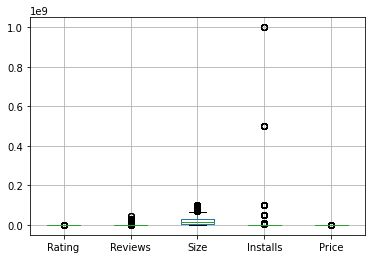

In [ ]:
ds.boxplot()  # to display the distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd25ef29d50>],
      dtype=object)

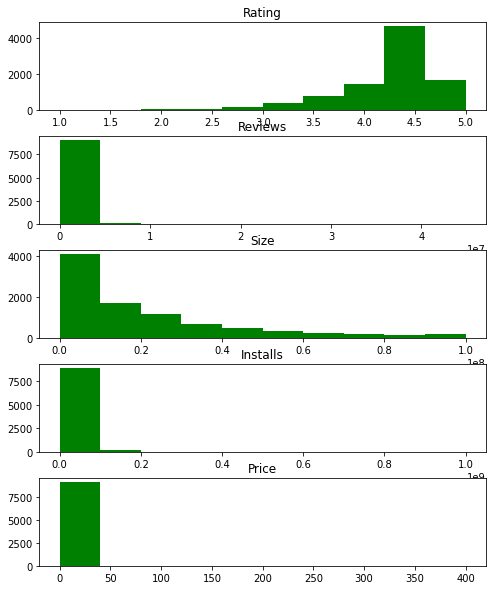

In [ ]:
ds.hist(grid=False, figsize=(8,10), layout=(5,1), color='green')  # histogram to visualise 4 numeric parameters

In [ ]:
# Category
cg = ds.Category.unique()
cg

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

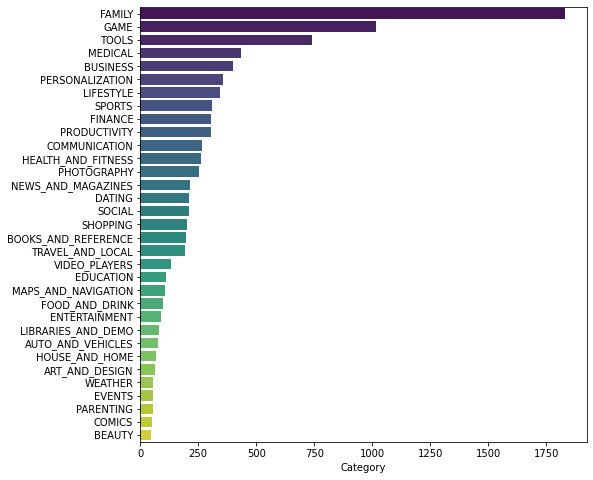

In [ ]:
# Visualization of various categories

plt.figure(figsize=(8,8))
most_cg = ds.Category.value_counts()
sns.barplot(x=most_cg, y=most_cg.index, data=ds, palette='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


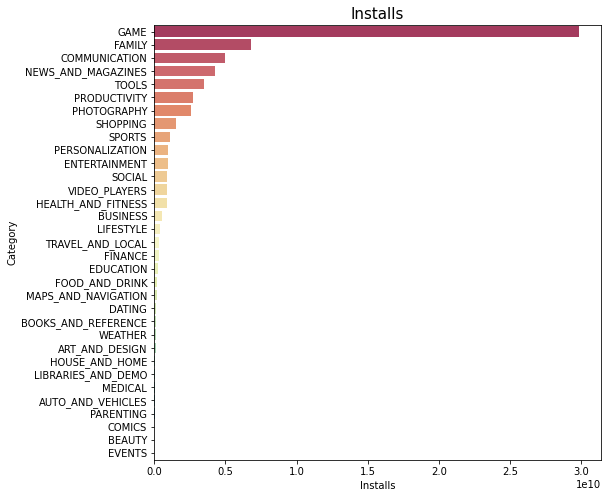

In [ ]:
# Plotting the apps on basis of the number of Installs

highest_Installs_df = ds.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

xlist = []
ylist = []

for i in range(len(highest_Installs_df)):
    xlist.append(highest_Installs_df.Installs[i])
    ylist.append(highest_Installs_df.index[i])

plt.figure(figsize=(8,8))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(xlist, ylist, alpha =0.9, palette= "Spectral")
graph.set_title("Installs", fontsize = 15);

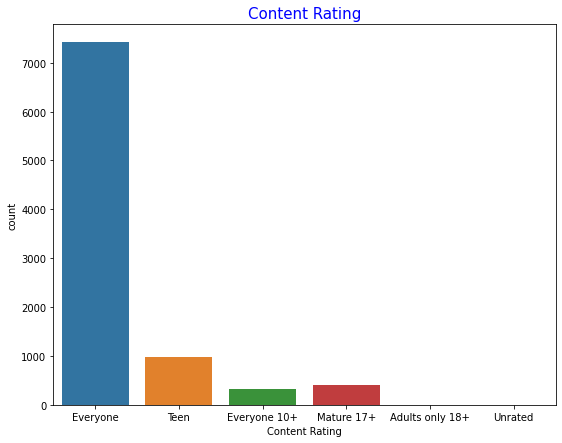

In [ ]:
# Content rating

plt.figure(figsize=(9,7))
sns.countplot(data=ds, x='Content Rating')
plt.xticks(rotation=0)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()